# this is used to check whether all places are within Chinatown London, and visualize them with their total number and mean value of ratings

In [1]:
import requests
import json
import time
import os
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import re
import string
import pandas as pd

In [10]:
path = r'' ### customize this path to excute following codes

In [3]:
metadata = pd.read_csv(path+'\metadata.csv')

### visualize the geographical defination of Chinatown London

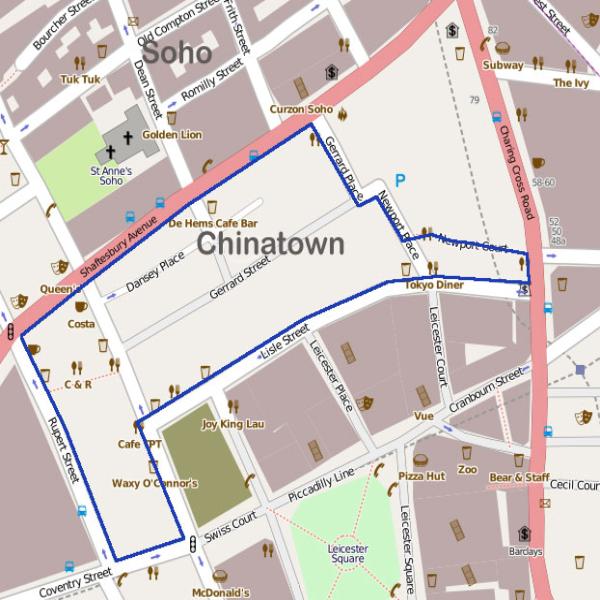

In [4]:
import PIL
from PIL import Image
import requests
from io import BytesIO

url = 'https://upload.wikimedia.org/wikipedia/commons/f/f3/Chinatown_london_map.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).resize((600,600),resample=PIL.Image.BILINEAR)
img

### define a region of Chinatown by using polygons

In [5]:
left_top = [51.512476, -0.1335]
right_top = [51.512768, -0.128]
left_bottom = [51.510104, -0.1335]
right_bottom = [51.510347, -0.128]
reg = np.array([left_top,left_bottom,right_bottom,right_top])
max_region = Polygon(reg)

region = np.array([[51.510444, -0.131537],
                [51.510359, -0.132143],
                [51.511472, -0.133004],
                [51.512556, -0.130401],
                [51.512198, -0.130007],
                [51.512233, -0.129819],
                [51.512000, -0.129594],
                [51.512000, -0.128470],
                [51.511721, -0.128462],
                [51.511778, -0.129385],
                [51.511563, -0.130477],
                [51.511003, -0.131805],])

region_ = np.array([[51.510444, -0.131537],
                [51.510359, -0.132143],
                [51.511472, -0.133004],
                [51.512556, -0.130401],
                [51.512198, -0.130007],
                [51.512233, -0.129819],
                [51.512000, -0.129594],
                [51.512000, -0.128470],
                [51.511721, -0.128462],
                [51.511778, -0.129385],
                [51.511563, -0.130477],
                [51.511003, -0.131805],
                   [51.510444, -0.131537]])

poly = Polygon(region)

### Check whether all places are within the region

In [6]:
in_the_place = []
out_the_place = []
out_side = []
positions_list = []
for each_site in range(metadata.shape[0]):
    
    positions = metadata.loc[each_site,['lat','lng']]
    
    positions_list.append(positions)
    
    point = Point(positions)

    if point.within(max_region):
    
      if point.within(poly):
          
          in_the_place.append(each_site)
    
      else:

          out_the_place.append(each_site)

    else:
          out_side.append(each_site)

          continue


### show the mean value of rating and top 10 places in terms of thier ratings

In [7]:
high_rating = metadata[metadata['total_rating']>=100].sort_values(by = 'rating',ascending = False)[:10]
metadata.loc[in_the_place,['rating']].values.mean()

4.016949152542373

In [8]:
high_rating

,name,total_rating,place_id,rating,lat,lng
93,London Premier Laser & Skin Clinic Soho,158,ChIJk1zHitIEdkgR1rBWu9Dah6M,4.8,51.512369,-0.130593
52,The Palomar,1227,ChIJ37AHt9MEdkgRDVY9ZuyydVA,4.6,51.511214,-0.132733
35,Mamasons Dirty Ice cream (Chinatown London),365,ChIJt5XRU1EFdkgRiQ4GELgsyME,4.5,51.511962,-0.128939
103,Waxy O'Connor's,5077,ChIJI_raytMEdkgRQBNj5weKsxM,4.5,51.510819,-0.132399
53,Tokyo Diner,1684,ChIJnTb2eNIEdkgRYxVs-t9LtDw,4.5,51.511820,-0.129314
3,Bun House,983,ChIJxfwuvtIEdkgRzkGKnK1ssek,4.4,51.511741,-0.129814
12,Chinatown Gate,6414,ChIJVz8KStIEdkgRfSWp1wJliIg,4.4,51.511008,-0.131821
59,Yolkin,292,ChIJq2ojttMEdkgRj41BcpLjlZ0,4.4,51.511001,-0.132540
69,Cuppacha,710,ChIJT6Mch80EdkgRDaXVNa0tyDg,4.4,51.511924,-0.129135
48,SHIBUYA SOHO,639,ChIJpfdjX9IEdkgRVSwAM1MCL5k,4.3,51.512258,-0.130941


### visualize the places in terms of the number and mean of ratings

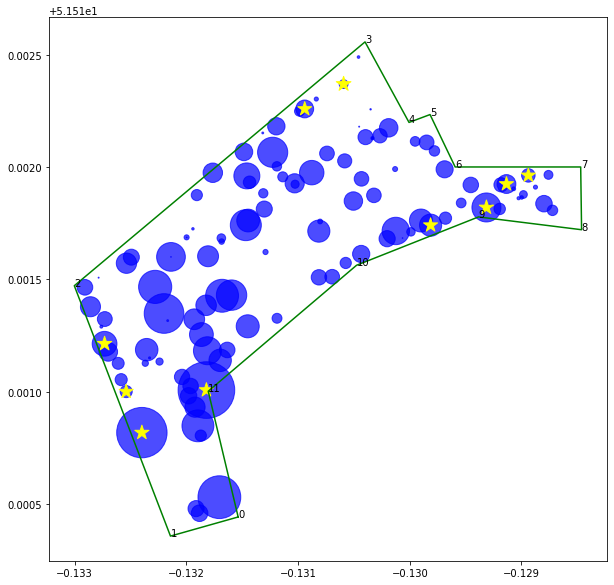

In [9]:
plt.figure(figsize = (10,10))
plt.plot(region_[:,1],region_[:,0],c = 'green')
for i in range(len(region)):
  plt.text(region[i,1],region[i,0],s = i)
plt.scatter(metadata.loc[out_the_place,'lng'],metadata.loc[out_the_place,'lat'],c = 'red',s = metadata.loc[out_the_place,'total_rating']/2,alpha = 0.7)
plt.scatter(metadata.loc[in_the_place,'lng'],metadata.loc[in_the_place,'lat'],c = 'blue',s = metadata.loc[in_the_place,'total_rating']/2,alpha = 0.7)
plt.scatter(high_rating.loc[:,'lng'],high_rating.loc[:,'lat'],marker = '*',s = high_rating.loc[:,'rating']*50,color = 'yellow')